当前时间：2024-11-04 16:05:38
今天是工作日
Date: 20241127, Days: 23
Date: 20241225, Days: 51
Date: 20250326, Days: 142
Date: 20250625, Days: 233


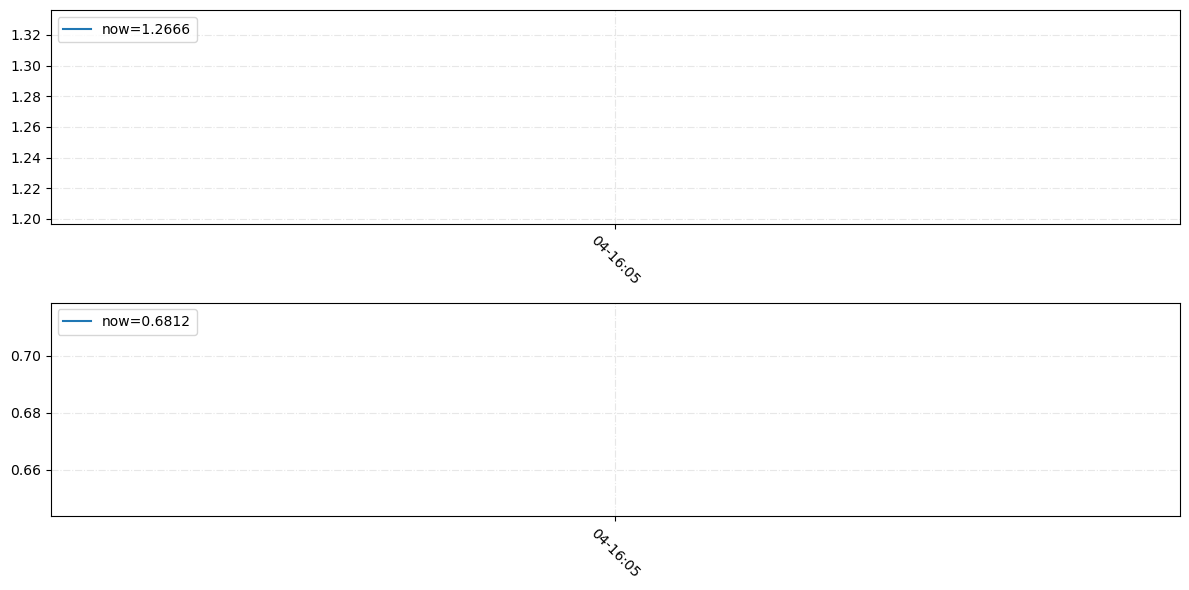

1
"50ETF购12月  >>>>>>  1.2666320225036434
[04-16:05]min0 =  1.2666320225036434
[04-16:05]max0 =  1.2666320225036434
"50ETF购11月  >>>>>>  0.6811851477839597
[04-16:05]min1 =  0.6811851477839597
[04-16:05]max1 =  0.6811851477839597
//////////////////////////////////////////



In [ ]:
import requests
import json
import time
import datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from IPython.display import clear_output
import re
import holidays

# 定义中国的节假日
cn_holidays = holidays.China()

# 定义函数以判断是否是工作日
def is_weekday(date):
    return date.weekday() < 5 and date not in cn_holidays

lst_up0 = []  # 存储为list
lst_dw0 = []
lst_up1 = []  # 存储为list
lst_dw1 = []

lst_time = []
lst_res0 = []
lst_res1 = []

lst_time_daily = []
lst_res_daily = []

# 剩余天数
day_url = 'https://63.push2.eastmoney.com/api/qt/stock/get?cb=jQuery112402949626469249085_1729738206366&mspt=1&secid=1.510050&ut=bd1d9ddb04089700cf9c27f6f7426281&_=1729738206367'

# 10月
url_0 = ''

# 12
url_01 = 'https://61.push2.eastmoney.com/api/qt/slist/get?cb=jQuery11240275445996784327_1729737405525&secid=1.510050&exti=202412&spt=9&fltt=2&invt=2&np=1&ut=bd1d9ddb04089700cf9c27f6f7426281&fields=f1%2Cf2%2Cf3%2Cf4%2Cf5%2Cf12%2Cf13%2Cf14%2Cf108%2Cf152%2Cf161%2Cf249%2Cf250%2Cf330%2Cf334%2Cf339%2Cf340%2Cf341%2Cf342%2Cf343%2Cf344%2Cf345%2Cf346%2Cf347&fid=f161&pn=1&pz=20&po=0&wbp2u=%7C0%7C0%7C0%7Cweb&_=1729737405615'
url_02 = 'https://61.push2.eastmoney.com/api/qt/slist/get?cb=jQuery11240275445996784327_1729737405525&secid=1.510050&exti=202412&spt=9&fltt=2&invt=2&np=1&ut=bd1d9ddb04089700cf9c27f6f7426281&fields=f1%2Cf2%2Cf3%2Cf4%2Cf5%2Cf12%2Cf13%2Cf14%2Cf108%2Cf152%2Cf161%2Cf249%2Cf250%2Cf330%2Cf334%2Cf339%2Cf340%2Cf341%2Cf342%2Cf343%2Cf344%2Cf345%2Cf346%2Cf347&fid=f161&pn=2&pz=20&po=0&wbp2u=%7C0%7C0%7C0%7Cweb&_=1729737405618'

# 11月
url_1 = 'https://61.push2.eastmoney.com/api/qt/slist/get?cb=jQuery11240275445996784327_1729737405525&secid=1.510050&exti=202411&spt=9&fltt=2&invt=2&np=1&ut=bd1d9ddb04089700cf9c27f6f7426281&fields=f1%2Cf2%2Cf3%2Cf4%2Cf5%2Cf12%2Cf13%2Cf14%2Cf108%2Cf152%2Cf161%2Cf249%2Cf250%2Cf330%2Cf334%2Cf339%2Cf340%2Cf341%2Cf342%2Cf343%2Cf344%2Cf345%2Cf346%2Cf347&fid=f161&pn=1&pz=20&po=0&wbp2u=%7C0%7C0%7C0%7Cweb&_=1729737405606'

url_11 = ''
url_12 = ''


min_value0 = 99
max_value0 = 0
min_time0 = 0
max_time0 = 0
min_value1 = 99
max_value1 = 0
min_time1 = 0
max_time1 = 0
count = 0
res0 = 0
res1 = 0
first = True

daily_flag = False

lst_time.clear()
lst_res0.clear()
lst_res1.clear()

lst_time_daily.clear()
lst_res_daily.clear()

while True:
    # 范围时间
    d_time0 = datetime.datetime.strptime(str(datetime.datetime.now().date()) + '9:25', '%Y-%m-%d%H:%M')
    d_time1 = datetime.datetime.strptime(str(datetime.datetime.now().date()) + '11:30', '%Y-%m-%d%H:%M')
    d_time2 = datetime.datetime.strptime(str(datetime.datetime.now().date()) + '13:00', '%Y-%m-%d%H:%M')
    d_time3 = datetime.datetime.strptime(str(datetime.datetime.now().date()) + '15:05', '%Y-%m-%d%H:%M')
    
    d_time4 = datetime.datetime.strptime(str(datetime.datetime.now().date()) + '00:05', '%Y-%m-%d%H:%M')
    d_time5 = datetime.datetime.strptime(str(datetime.datetime.now().date()) + '00:06', '%Y-%m-%d%H:%M')

    # 当前时间
    n_time = datetime.datetime.now()
    now = time.strftime("%Y-%m-%d %H:%M:%S")
    daily_time = time.strftime("%Y-%m-%d")
    x_time = time.strftime("%d-%H:%M")
    print('当前时间：{}'.format(now))
    today = datetime.date.today()
    if is_weekday(today):
        print("今天是工作日")
    else:
        print("今天是周末或节假日")
    
    try_count = 0
    while True:
        try:
            rest_day=requests.get(day_url, timeout=5)
            rest_day_text = rest_day.text
            # Use regular expressions to find all date and days fields
            matches = re.findall(r'"date":(\d+),"days":(\d+)', rest_day_text)
            
            # Convert to a list of dictionaries
            data = [{"date": int(date), "days": int(days)} for date, days in matches]
            
            # Output the result
            for entry in data:
                print(f"Date: {entry['date']}, Days: {entry['days']}")
            break
        except:
            try_count += 1
            print(f"res0 = {res0}, try again{try_count}...")
            time.sleep(5)

    # 判断当前时间是否在范围时间内
    if first or (is_weekday(today) and n_time > d_time0 and n_time < d_time1) or (n_time > d_time2 and n_time < d_time3):    
        if first is True:
            first = False
            
        daily_flag = False
        
        lst_up0.clear()
        lst_dw0.clear()
        lst_up1.clear()
        lst_dw1.clear()
        count %= 6
#         print(count)
        
        if count == 0:
            try_count = 0
            while True:
                try:
                    res0=requests.get(url_01, timeout=5)
                    res0_text = res0.text

                    name_pos = res0.text.find('月')
                    pos = res0.text.find('(')
                    print('res0 get data1-1 success!')
                    
                    table=json.loads(res0.text[pos+1:-2])
                    for data in table['data']['diff']:
                        if (isinstance(data['f108'], int)) & (isinstance(data['f345'], int)):
                            lst_dw0.append(data['f108'])
                            lst_up0.append(data['f345'])
                    break
                except:
                    try_count += 1
                    print('res0 = {}, try again...'.format(res0))
                    time.sleep(5)
            
            try_count = 0
            while True:
                try:
                    res0=requests.get(url_02, timeout=5)
                    pos = res0.text.find('(')
                    print('res0 get data1-2 success!')
                    
                    table=json.loads(res0.text[pos+1:-2])
                    for data in table['data']['diff']:
                        if (isinstance(data['f108'], int)) & (isinstance(data['f345'], int)):
                            lst_dw0.append(data['f108'])
                            lst_up0.append(data['f345'])
                    break
                except:
                    try_count += 1
                    time.sleep(5)
                
            try_count = 0
            while True:
                try:
                    res1=requests.get(url_1, timeout=5)
                    res1_text = res1.text;
                    name_pos1 = res1.text.find('月')
                    pos = res1.text.find('(')
                    print('res1 get data2-1 success!')
                    
                    table=json.loads(res1.text[pos+1:-2])
                    for data in table['data']['diff']:
                        if (isinstance(data['f108'], int)) & (isinstance(data['f345'], int)):
                            lst_dw1.append(data['f108'])
                            lst_up1.append(data['f345'])
                    break
                except:
                    try_count += 1
                    print('res = {}, try again...'.format(res1))
                    time.sleep(5)
    
          
#             try_count = 0   
#             while True:
#                 try:
#                     res1=requests.get(url_11, timeout=5)
#                     pos = res1.text.find('(')
#                     print('res1 get data2-1 success!')
                    
#                     table=json.loads(res1.text[pos+1:-2])
#                     for data in table['data']['diff']:
#                         if (isinstance(data['f108'], int)) & (isinstance(data['f345'], int)):
#                             lst_dw1.append(data['f108'])
#                             lst_up1.append(data['f345'])
#                     break
#                 except:
#                     try_count += 1
#                     time.sleep(5) 
            
#             try_count = 0    
#             while True:
#                 try:
#                     res1=requests.get(url_12, timeout=5)
#                     pos = res1.text.find('(')
#                     print('res1 get data2-2 success!')
                    
#                     table=json.loads(res1.text[pos+1:-2])
#                     for data in table['data']['diff']:
#                         if (isinstance(data['f108'], int)) & (isinstance(data['f345'], int)):
#                             lst_dw1.append(data['f108'])
#                             lst_up1.append(data['f345'])
#                     break
#                 except:
#                     try_count += 1
#                     time.sleep(5) 

#             print(lst_up1, type(lst_up1[-1]))
#             print(lst_dw1)

            # lst_time.append(now)
            
            res0 = sum(lst_up0)/sum(lst_dw0)
            if min_value0 > res0:
                min_value0 = res0
                min_time0 = x_time
                
            if max_value0 < res0:
                max_value0 = res0
                max_time0 = x_time
            
            res1 = sum(lst_up1)/sum(lst_dw1)
            if min_value1 > res1:
                min_value1 = res1
                min_time1 = x_time
                
            if max_value1 < res1:
                max_value1 = res1
                max_time1 = x_time
                
            lst_res0.append(res0)
            lst_res1.append(res1)    
            lst_time.append(x_time)
            
            if len(lst_time) > 400:
                lst_res0.pop(0)
                lst_res1.pop(0)
                lst_time.pop(0)
                
    #根据ticker的功能改变第一个为初始的数据，第二个则为距离
    ticker_spacing = lst_time
    ticker_spacing = 15

    plt.figure(1, figsize=(12, 6))
    plt.clf()

    ax1=plt.subplot(2, 1, 1)
#    ax1.set_title('2024-10 50ETF-PCR')
    plt.grid(alpha=0.3, linestyle='-.')  # alpha表示透明度, linestyle表示线条风格
    ax1.xaxis.set_major_locator(ticker.MultipleLocator(ticker_spacing))
    plt.xticks(rotation=-45)

    # 先画线，再描点
    plt.plot(lst_time, lst_res0, label = "now={}".format(round(res0, 4)))    
    # plt.plot(min_time0, min_value0, label = "min={}".format(round(min_value0, 4)), marker='s')
    # plt.plot(max_time0, max_value0, label = "max={}".format(round(max_value0, 4)), marker='D')
    plt.legend(loc='upper left')
#             print("min0: {}, {}".format(min_time0, min_value0))
#             print("max0: {}, {}".format(max_time0, max_value0))


    ax2=plt.subplot(2, 1, 2) 
#    ax2.set_title('2024-09 50ETF-PCR')
    plt.grid(alpha=0.3, linestyle='-.')  # alpha表示透明度, linestyle表示线条风格
    ax2.xaxis.set_major_locator(ticker.MultipleLocator(ticker_spacing))
    plt.xticks(rotation=-45)

    plt.plot(lst_time, lst_res1, label = "now={}".format(round(res1, 4))) 
    # plt.plot(min_time1, min_value1, label = "min={}".format(round(min_value1, 4)), marker='s')
    # plt.plot(max_time1, max_value1, label = "max={}".format(round(max_value1, 4)), marker='D')
    plt.legend(loc='upper left')
#             print("min1: {}, {}".format(min_time1, min_value1))
#             print("max1: {}, {}".format(max_time1, max_value1))

#     if n_time > d_time4 and n_time < d_time5:
#         print("time to start record daily data")
#         if daily_flag is False:
#             print("record daily data...")
#             lst_time_daily.append(daily_time)
#             lst_res_daily.append(res0)
            
#             plt.figure(2)
#             plt.clf()
#             plt.plot(lst_time_daily, lst_res_daily) 
#             print("saving daily data...")
#             plt.savefig(fname="dailyBBI.png")
#             daily_flag = True
    
    plt.tight_layout() #自动调整子图间距
    plt.show()                   

    
    count += 1
    print(len(lst_time))
    print(res0_text[name_pos-9:name_pos+1], ' >>>>>> ', res0)
    print('[{}]min0 = '.format(min_time0), min_value0)
    print('[{}]max0 = '.format(max_time0), max_value0)
    print('==========================================')
    print(res1_text[name_pos1-9:name_pos1+1], ' >>>>>> ', res1)
    print('[{}]min1 = '.format(min_time1), min_value1)
    print('[{}]max1 = '.format(max_time1), max_value1)
    print('//////////////////////////////////////////')
    print()
    
    time.sleep(10)
    clear_output(wait=True)
   

